# CAPSTONE PROJECT

Group 4 members:

- Tony Munene
- Loise Mbago
- Immanuel Omondi
- Nazra Nyangwara
- Bahati Ndwiga
- Cleophas Opati
- Stephen Gathai - Team Lead

# DEEP LEARNING IN BREAST CANCER DETECTION

## 1.0 Business Understanding

### 1.1 Background

Breast cancer ranks as the most common cancer globally and the second leading cause of cancer-related deaths. According to the World Health Organization (WHO), breast cancer is the primary cause of death among women aged 45-55 years with, affecting 1 in 8 women. Early detection and timely intervention play a pivotal role in the prognosis of breast cancer. When detected early, and if adequate diagnosis and treatment are available, the chances of survival increase significantly. Thus, the importance of early detection cannot be overstated, as it can lead to more effective treatments, reduce the need for aggressive intervention procedures, and substantially lower breast-cancer-related deaths.

Currently, mammography and ultrasound are the primary imaging modalities for breast cancer diagnosis. However, these modalities are limited in the extent to which they facilitate early diagnosis. First, follow-up ultrasound, aspiration, or biopsy may need to be performed after a breast ultrasound image is interpreted to determine whether a suspicious abnormality is cancer. Often, most of the suspected problem locations detected by ultrasonography that require biopsy are noncancerous. Second, many tumors cannot be detected via ultrasonography and annual mammography is still recommended. However, in mammography, some early breast tumors simply manifest as calcifications and go undetected. Therefore, more sophisticated tools are required to overcome the limitations of ultrasound in the early detection of breast cancer.

Machine learning, particularly deep learning, offers promising solutions in aiding early detection through image analysis to make the diagnostic process more efficient and accurate.

### 1.2 Problem Statement
The Breast Cancer Research Foundation(BCRF) is seeking to advance breast cancer research by harnessing deep learning to transform early detection and intervention in breast cancer treatment and management. They have engaged our services to design and implement a cutting-edge Deep Learning-Based Breast Cancer Prediction System (DL-BCPS) capable of analyzing medical imaging data, including mammograms and ultrasound images to accurately predict the presence of breast cancer in patients. Through the DL-BCPS, BCRF aims to revolutionize breast cancer research, significantly enhancing both the precision and efficiency of breast cancer diagnosis and providing healthcare professionals with a valuable tool to facilitate timely medical intervention, improve patient outcomes, and support decision-making.

### 1.3 Objectives
1. To develop a deep learning model using medical imaging data capable of efficient segmentation of breast masses in ultrasound images.

2. To identify critical parameters for breast cancer detection.

3. To implement a user-friendly interface for healthcare professionals to upload medical images and receive predictions.

4. To develop a model with at least 90% specificity and 90% sensitivity for accurate predictions.

### 1.4 Success Criteria
The model should:
- Achieve a classification accuracy of at least 85% on the test dataset.
- Achieve a sensitivity of at least 90% and a specificity of at least 90%
- Have a high F1-score to ensure a balance between precision and recall.
- Demonstrate good generalization by performing well on unseen data.

## 2.0 Data Understanding

The [Breast Ultrasound Images Dataset](https://scholar.cu.edu.eg/?q=afahmy/pages/dataset) comprises breast ultrasound images from 600 female patients aged between 25 and 75 years. The dataset consists of 780 images with an average image size of 500 × 500 pixels. The images are stored in PNG format.

The data is categorized into three sets:

- Benign: This set contains 437 images.
- Malignant: This set contains 210 images.
- Normal: This set contains 133 images.

In [ ]:
# Import relevant libraries
import os
import random
import warnings
from itertools import chain
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121, InceptionV3, MobileNetV2, ResNet50, VGG16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (BatchNormalization, Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

# Defining paths to the directories
normal_path = '/content/drive/MyDrive/Breast_cancer_dataset/normal'
benign_path = '/content/drive/MyDrive/Breast_cancer_dataset/benign'
malignant_path = '/content/drive/MyDrive/Breast_cancer_dataset/malignant'
image_dir = '/content/drive/MyDrive/Breast_cancer_dataset'

Mounted at /content/drive


### a. Preview sample images

We begin by visualizing a few sample images from our dataset to understand their characteristics.


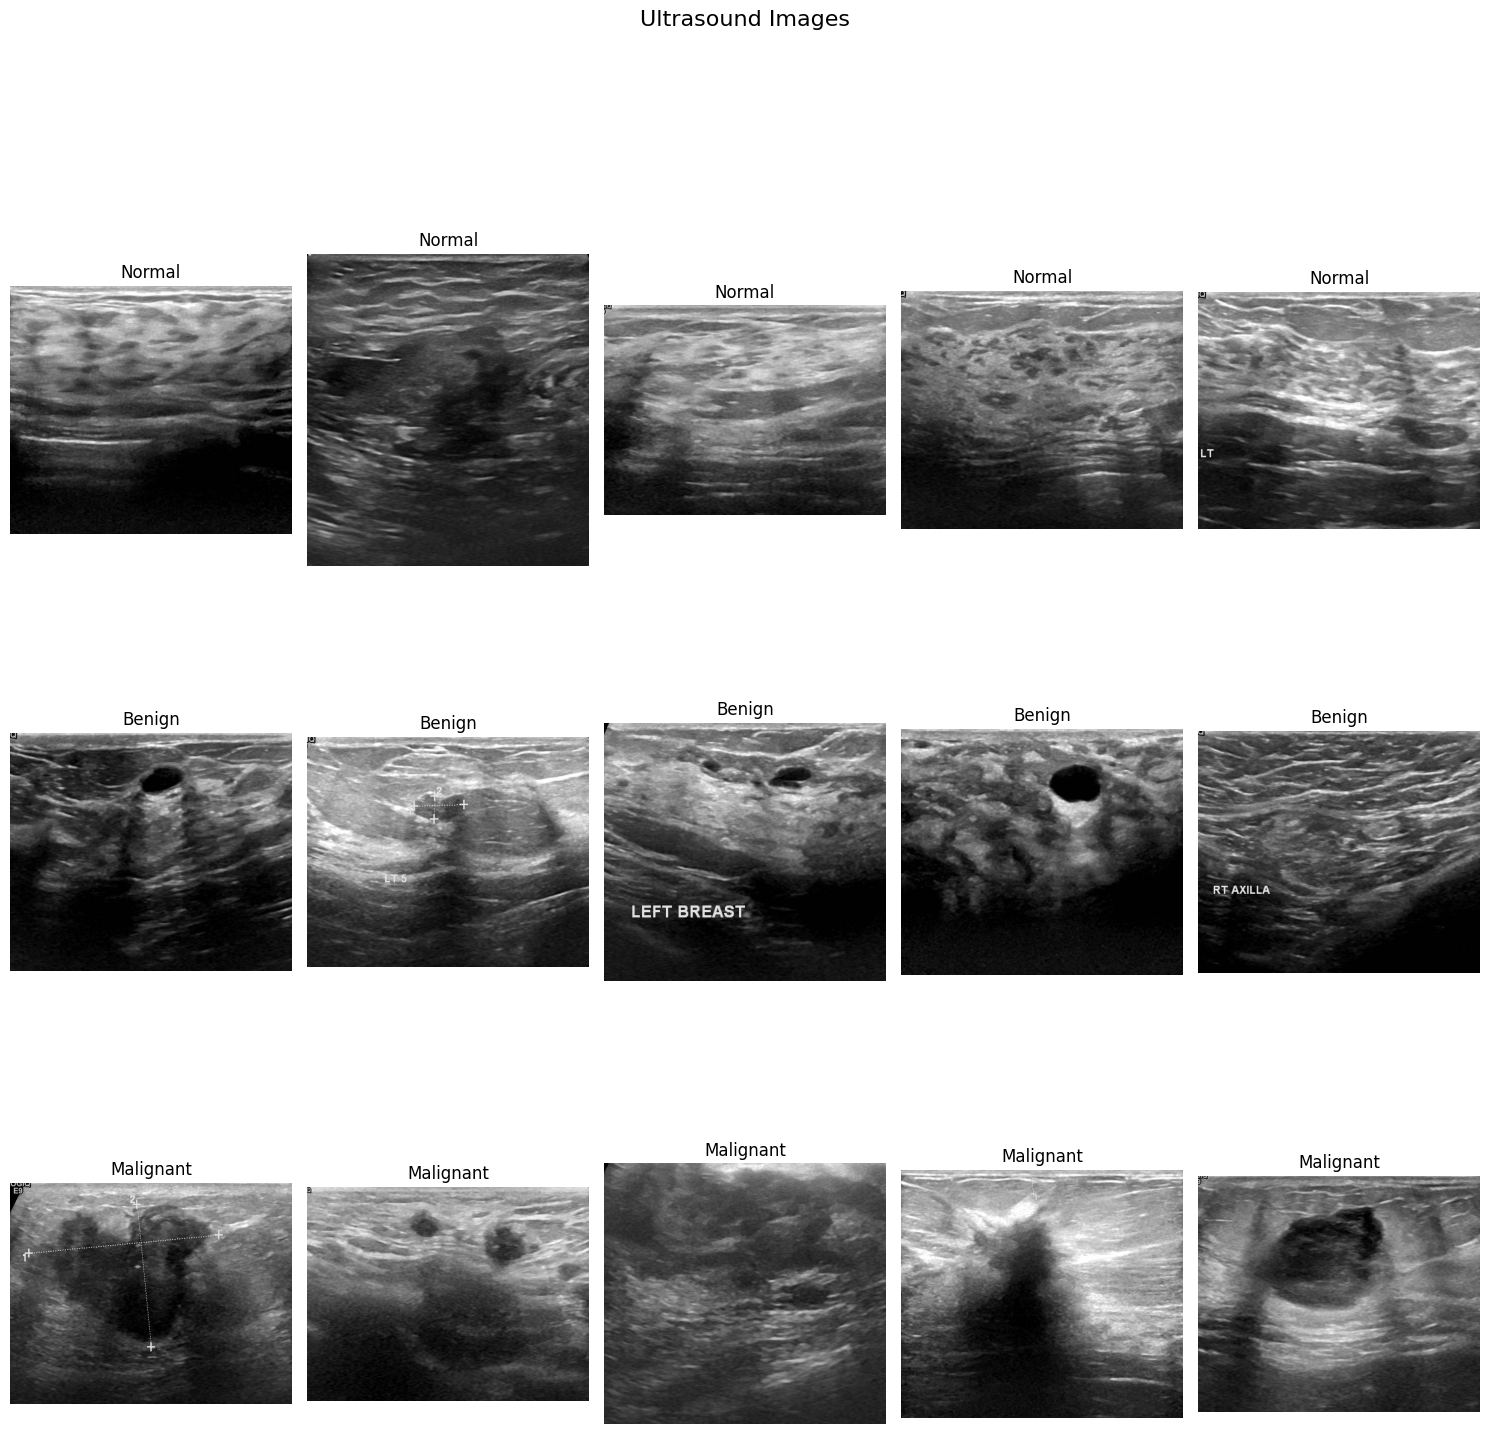

In [ ]:
# Preview sample images

# Create dictionary for categories and paths
categories_paths = {
    'normal': normal_path,
    'benign': benign_path,
    'malignant': malignant_path
}

# Randomly sample 5 images from each category
normal_images = [os.path.join(normal_path, fname) for fname in random.sample(os.listdir(normal_path), 5)]
benign_images = [os.path.join(benign_path, fname) for fname in random.sample(os.listdir(benign_path), 5)]
malignant_images = [os.path.join(malignant_path, fname) for fname in random.sample(os.listdir(malignant_path), 5)]

# Plot images
fig, axes = plt.subplots(3, 5, figsize=(15, 15))
fig.suptitle('Ultrasound Images', fontsize=16, y=1.05)

# Display normal images
for ax, img_path in zip(axes[0], normal_images):
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.set_title("Normal")
    ax.axis('off')

# Display benign images
for ax, img_path in zip(axes[1], benign_images):
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.set_title("Benign")
    ax.axis('off')

# Display malignant images
for ax, img_path in zip(axes[2], malignant_images):
    img = mpimg.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.set_title("Malignant")
    ax.axis('off')

plt.tight_layout()
plt.show()


Observations:
- From the imagse, the presence of tumors is apparent in some images while others appear normal. This is consistent with the observations that would be derived from ultrasounds of normal, benign and malignant cases.

- A normal image indicates no signs of breast cancer. The normal ultrasounds have a uniform texture without noticeable masses or lesions. The images have darker and brighter areas representing the tissues of the breast and fat layers.

- A benign image indicates the presence of tumors that usually stay in their primary location without invading other sites of the body. In the benign ultrasounds, there are distinct regions with noticeable masses that are darker than the surrounding tissue, with well-defined borders. These correspond with cysts that characterise benign tumors.

- A malignant image represents the presence of a tumor that is cancerous and can spread cancer cells throughout one's body through the blood or lymphatic system. The malignant ultrasound images exhibit irregularly-shaped lesions that appear darker than the surrounding tissue.

### b. Check for corrupt or missing images

Next, we examine our dataset for any missing or corrupted images. It is essential to ensure that all images in our dataset are accessible and not corrupted as this can disrupt the training process and lead to errors.

In [ ]:
# Check for missing or corrupt images

def check_images(directory):

    corrupt_files = []
    # List all files in the directory
    files = os.listdir(directory)
    for file in files:
        file_path = os.path.join(directory, file)
        try:
            # Try to open the image
            with Image.open(file_path) as img:
                # Check if the image is complete
                img.verify()
        except (IOError, SyntaxError) as e:
            corrupt_files.append(file_path)

    return corrupt_files

# Check each directory for corrupt or missing images
corrupt_normal = check_images(normal_path)
corrupt_benign = check_images(benign_path)
corrupt_malignant = check_images(malignant_path)

# Output the corrupt or missing files
corrupt_files = corrupt_normal + corrupt_benign + corrupt_malignant
if corrupt_files:
    print("Corrupt or missing files:")
    for file_path in corrupt_files:
        print(f" - {file_path}")
else:
    print("No corrupt or missing files found.")


No corrupt or missing files found.


### c. Check image sizes

In this section, we inspect the dimensions of the images in the dataset to determine if any resizing or mormalization steps will be necessary during preprocessing.

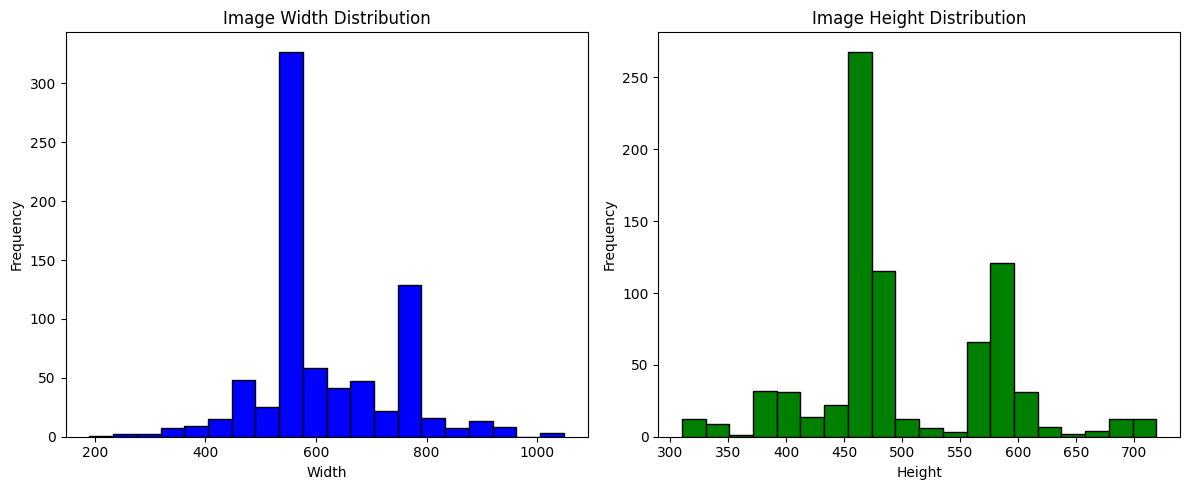

In [ ]:
# Initialize lists to store widths and heights
widths = []
heights = []

# Loop over each category and path
for category, path in categories_paths.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        # Read the image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Get the dimensions
        h, w = img.shape
        widths.append(w)
        heights.append(h)

# Plot the Image Size Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(widths, bins=20, color='blue', edgecolor='black')
axes[0].set_title('Image Width Distribution')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Frequency')

axes[1].hist(heights, bins=20, color='green', edgecolor='black')
axes[1].set_title('Image Height Distribution')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Observation:
- The image widths vary between 200 and 1500, with some outliers, while the heights range from 300 to 750, also with occasional outliers.

### d. Examine class distribution

In this section, we assess the class distribution within the dataset.

Number of images for each class:
Normal: 133 (17.05%)
Benign: 437 (56.03%)
Malignant: 210 (26.92%)


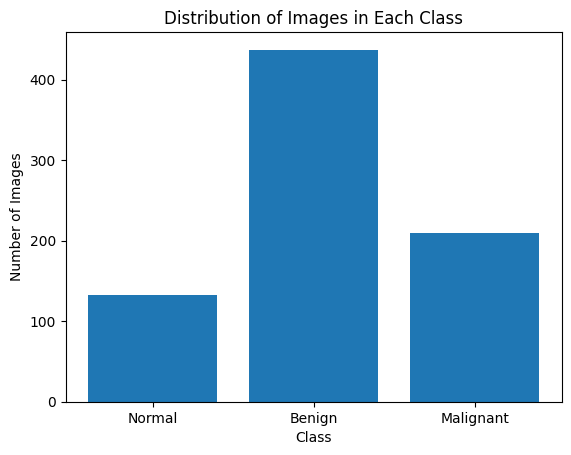

In [ ]:
# Get the list of files in each directory
normal_images = os.listdir(normal_path)
benign_images = os.listdir(benign_path)
malignant_images = os.listdir(malignant_path)

# Count the number of images in each class
num_normal_images = len(normal_images)
num_benign_images = len(benign_images)
num_malignant_images = len(malignant_images)

# Calculate percentages
total_images = num_normal_images + num_benign_images + num_malignant_images
percentage_normal = (num_normal_images / total_images) * 100
percentage_benign = (num_benign_images / total_images) * 100
percentage_malignant = (num_malignant_images / total_images) * 100

# Print the counts and percentages
print("Number of images for each class:")
print("Normal:", num_normal_images, f"({percentage_normal:.2f}%)")
print("Benign:", num_benign_images, f"({percentage_benign:.2f}%)")
print("Malignant:", num_malignant_images, f"({percentage_malignant:.2f}%)")

# Plot a bar chart to visualize the distribution
classes = ['Normal', 'Benign', 'Malignant']
counts = [num_normal_images, num_benign_images, num_malignant_images]

plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Each Class')
plt.show()

Observation:
- The output above reveals a noticeable class imbalance in the dataset. The benign category is significantly overrepresented compared to the normal and malignant categories. This imbalance will need to be addressed to ensure the model provides a reliable and generalizeABLE performance across all classes.

### e. Mask application

In this section we will apply masks to the ultrasound images. This step is crucial for segmenting regions of interest in the images and possibly highlighting areas with cancerous cells.

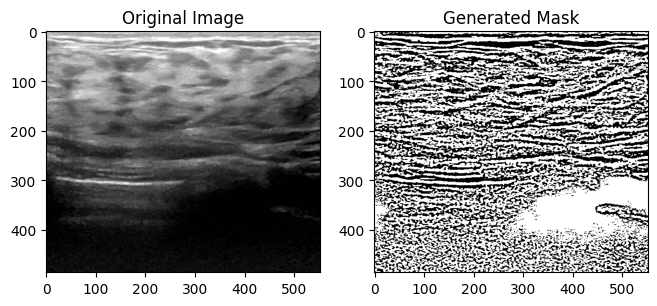

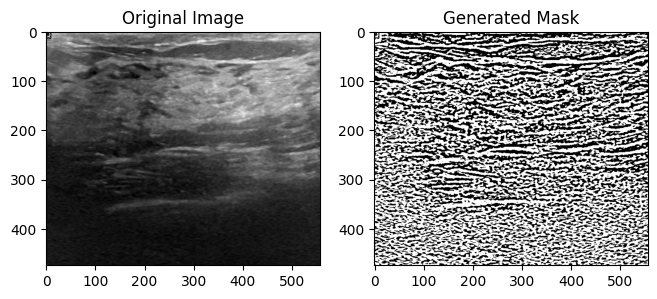

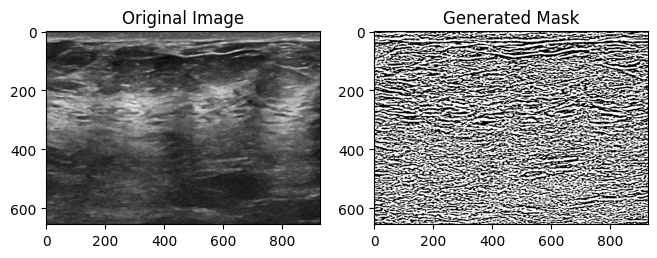

In [ ]:
# Define function to apply masks to original images
def apply_masks(images):
    masked_images = []
    for img in images:
        masked_img = cv2.bitwise_and(img, img, mask=img)
        masked_images.append(masked_img)
    return masked_images

def mask_analysis(image_path):
    try:
        # Get image files in the specified path
        image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if f.endswith('.png')]

        # Load images in grayscale
        images = [cv2.imread(img_f, cv2.IMREAD_GRAYSCALE) for img_f in image_files]

        # Apply adaptive thresholding to isolate cancerous regions
        masks = []
        for img in images:
            mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
            masks.append(mask)

            # Set all non-cancerous regions to black
            mask[mask != 255] = 0

        # Display original images and masked images for a sample of three images
        for i in range(3):
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(images[i], cmap='gray')
            plt.title('Original Image')

            plt.subplot(1, 3, 2)
            plt.imshow(masks[i], cmap='gray')
            plt.title('Generated Mask')

            plt.show()
    except Exception as e:
        print(f"Error processing images in {image_path}: {e}")

# Display masks of normal images
mask_analysis(normal_path)

Observation:
- The masks of the normal images align with the nature of normal ultrasound images, depicting consistency without any outstanding regions of interest. However, it is interesting to observe a masked image with regions of interest highlighted.

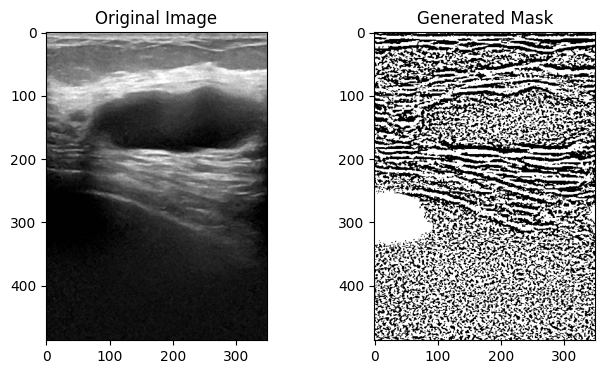

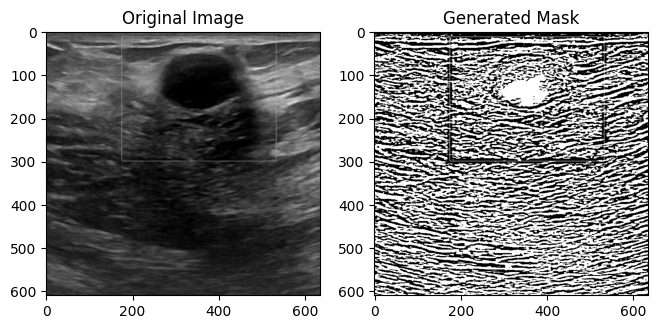

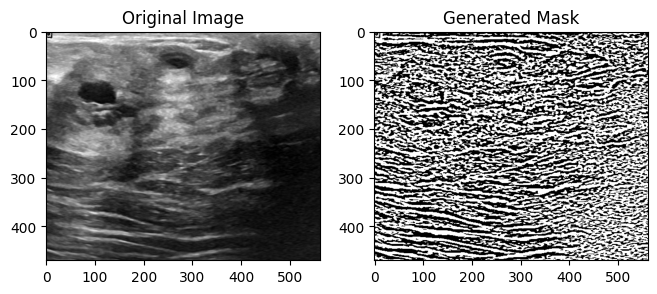

In [ ]:
# Display masks of benign images
mask_analysis(benign_path)

Observation:
- There are dstinct regions of interest highlighted by the white patches on the generated mask, outlining the locations of the tumors. The consistency on the masks also varies in regions with potential tumors that are not explicitly highlighted by white patches.
- The masks also reveal the defining nature of benign tumors, whicj often have well=defined edges.

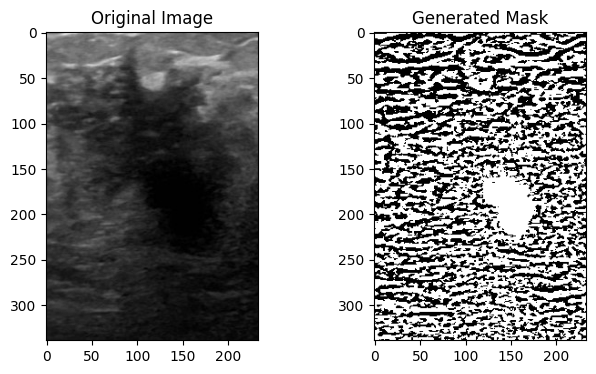

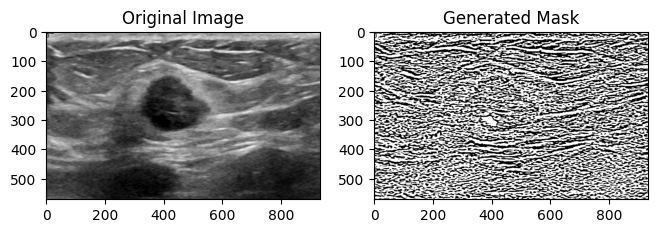

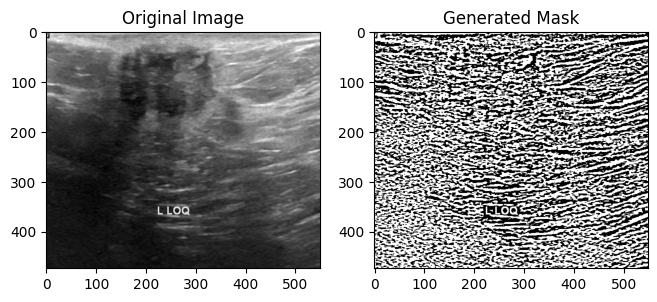

In [ ]:
# Display masks of malignant images
mask_analysis(malignant_path)

Observation:
- The masks on the malignant images also highlight regions of interest that are demarcated by white patches and inconsistent textures on the mask image.

## 3.0 Data Preparation

In this section, we will perform several preprocessing steps on the images to prepare them for training. This includes:
- Addressing class imbalance
- Resizing the images to a consistent size
- Normalizing the pixel values to a range between 0 and 1
- Creating labels for each class
- Applying data augmentation techniques to increase the variability and size of the training dataset

### a. Address class imbalance in the dataset

To handle the class imbalance in our dataset, we will oversample the minority classes - normal and malignant- with replacement in order to have the same number of images with th emajority class.

Number of images for each class (after balancing):
Normal: 437 (33.33%)
Benign: 437 (33.33%)
Malignant: 437 (33.33%)


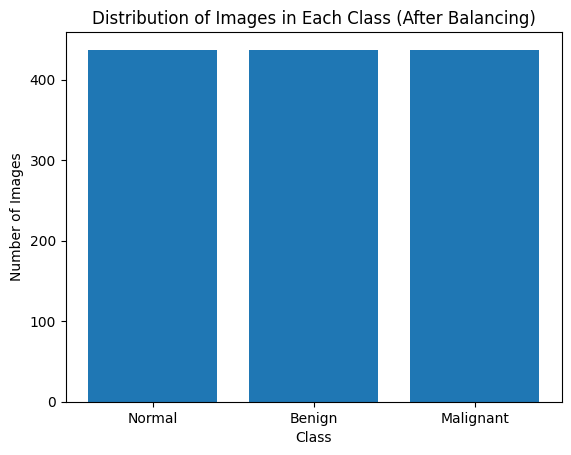

In [ ]:
# Calculate the target number of samples for balancing
target_num_samples = max(num_benign_images, num_malignant_images)

# Collecting paths of all .png images from the directories of each class
normal_image_paths = glob.glob(os.path.join(normal_path, '*.png'))
benign_image_paths = glob.glob(os.path.join(benign_path, '*.png'))
malignant_image_paths = glob.glob(os.path.join(malignant_path, '*.png'))

# Oversample the minority classes (Normal and Malignant) with replacement
oversampled_normal_image_paths = random.choices(normal_image_paths, k=target_num_samples)
oversampled_malignant_image_paths = random.choices(malignant_image_paths, k=target_num_samples)

# Update the counts
num_normal_images = len(oversampled_normal_image_paths)
num_malignant_images = len(oversampled_malignant_image_paths)

# Calculate percentages
total_images = num_normal_images + num_benign_images + num_malignant_images
percentage_normal = (num_normal_images / total_images) * 100
percentage_benign = (num_benign_images / total_images) * 100
percentage_malignant = (num_malignant_images / total_images) * 100

# Print the counts and percentages
print("Number of images for each class (after balancing):")
print("Normal:", num_normal_images, f"({percentage_normal:.2f}%)")
print("Benign:", num_benign_images, f"({percentage_benign:.2f}%)")
print("Malignant:", num_malignant_images, f"({percentage_malignant:.2f}%)")

# Plot a bar chart to visualize the distribution
classes = ['Normal', 'Benign', 'Malignant']
counts = [num_normal_images, num_benign_images, num_malignant_images]

plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Each Class (After Balancing)')
plt.show()

In [ ]:
num_normal_images, num_benign_images, num_malignant_images

(437, 437, 437)

Each class in the dataset now has an equal number of images.

### b. Resize and normalize images

Next, we resize the images to 224x224 pixels and normalize the pixel values

In [ ]:
# Resize images to 224x224 pixels
img_size = (224, 224)

def load_images(image_paths):
    images = []
    for filepath in image_paths:
        img = Image.open(filepath).convert('L')  # Convert to grayscale
        img = img.resize(img_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    return np.array(images)

# Load and process the oversampled images
processed_normal_images = load_images(oversampled_normal_image_paths)
processed_benign_images = load_images(benign_image_paths)
processed_malignant_images = load_images(oversampled_malignant_image_paths)

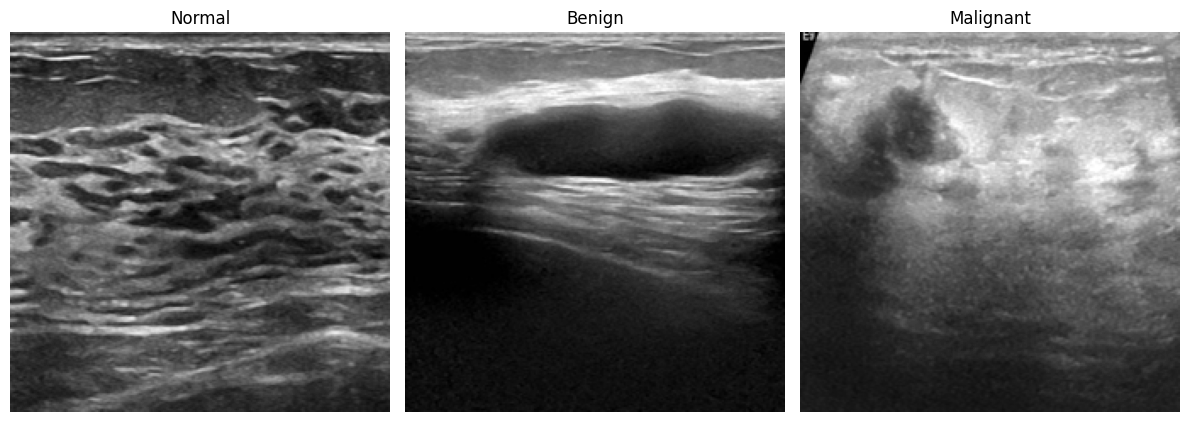

In [ ]:
# Display the first image from each category
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Displaying the first processed image from each category
axes[0].imshow(processed_normal_images[0], cmap='gray')
axes[0].set_title('Normal')
axes[0].axis('off')

axes[1].imshow(processed_benign_images[0], cmap='gray')
axes[1].set_title('Benign')
axes[1].axis('off')

axes[2].imshow(processed_malignant_images[0], cmap='gray')
axes[2].set_title('Malignant')
axes[2].axis('off')

plt.tight_layout()
plt.show()


### c. Data augmentation

Next, we perform data augmentation to further increase the size and variability of the dataset for training purposes.

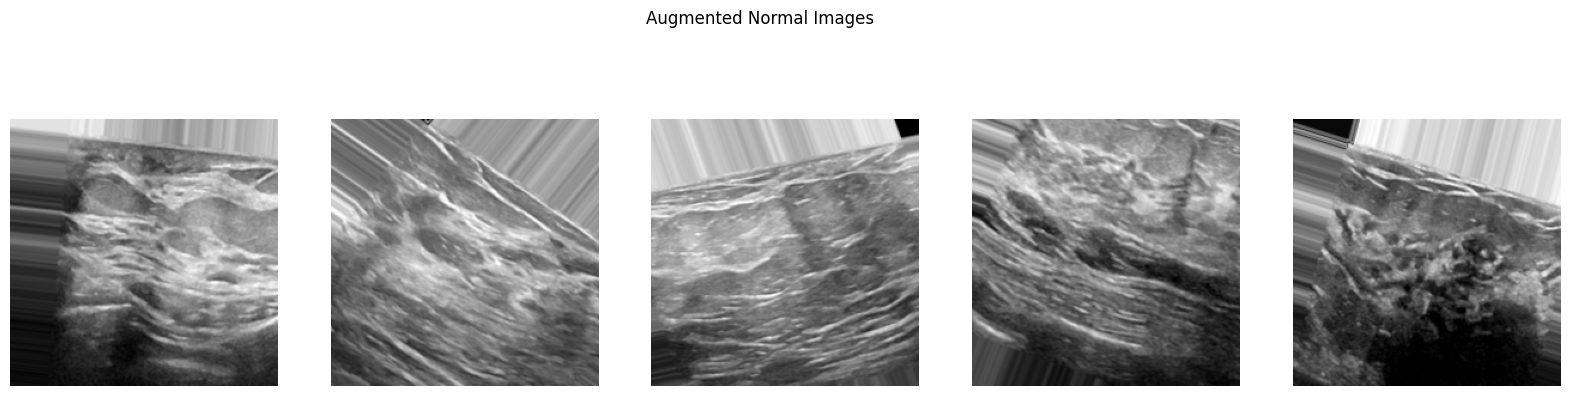

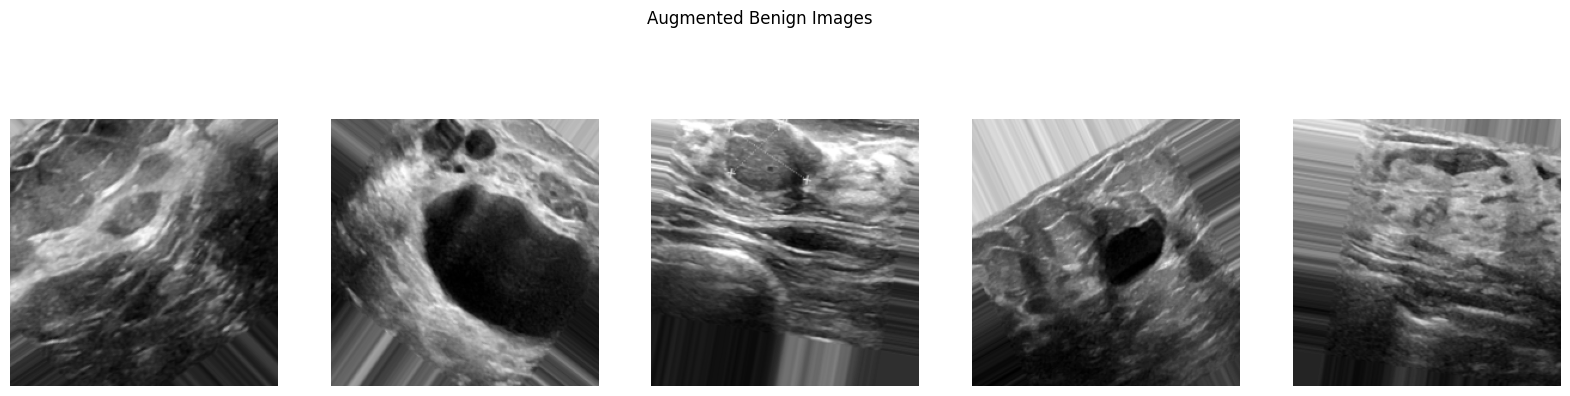

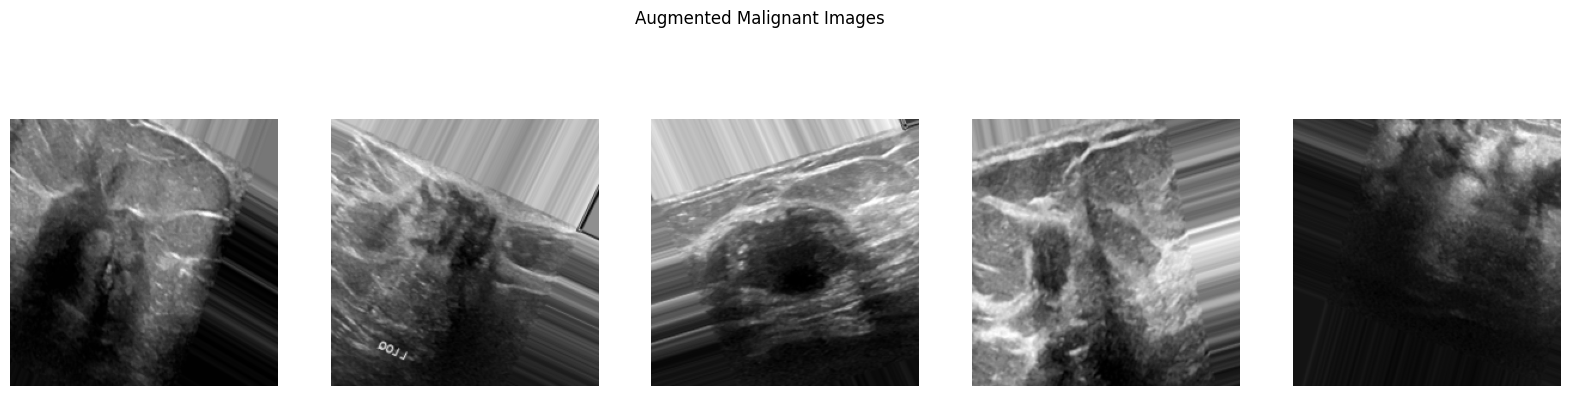

Total number of augmented images across all categories: 13110


In [ ]:
# Create a data generator object
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use the data generator to augment images
def augment_images(images_array, num_augmented_per_image=10):
    reshaped_images = images_array.reshape(images_array.shape[0], 224, 224, 1)
    datagen.fit(reshaped_images)

    augmented_images = []
    for x_batch in datagen.flow(reshaped_images, batch_size=1):
        augmented_images.extend(x_batch)
        if len(augmented_images) >= len(reshaped_images) * num_augmented_per_image:
            break
    return np.array(augmented_images)

augmented_normal_images = augment_images(processed_normal_images)
augmented_benign_images = augment_images(processed_benign_images)
augmented_malignant_images = augment_images(processed_malignant_images)

# Visualize some augmented images
def visualize_augmented_images(augmented_images, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    for i in range(5):
        axes[i].imshow(augmented_images[i].reshape(224, 224), cmap='gray')
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

visualize_augmented_images(augmented_normal_images, "Augmented Normal Images")
visualize_augmented_images(augmented_benign_images, "Augmented Benign Images")
visualize_augmented_images(augmented_malignant_images, "Augmented Malignant Images")

# Calculate the total number of augmented images across all categories
total_augmented_images = len(augmented_normal_images) + len(augmented_benign_images) + len(augmented_malignant_images)

# Print the total number of augmented images
print(f"Total number of augmented images across all categories: {total_augmented_images}")


After augmentation, we now have a total of 13110 images that we will use in training our models.

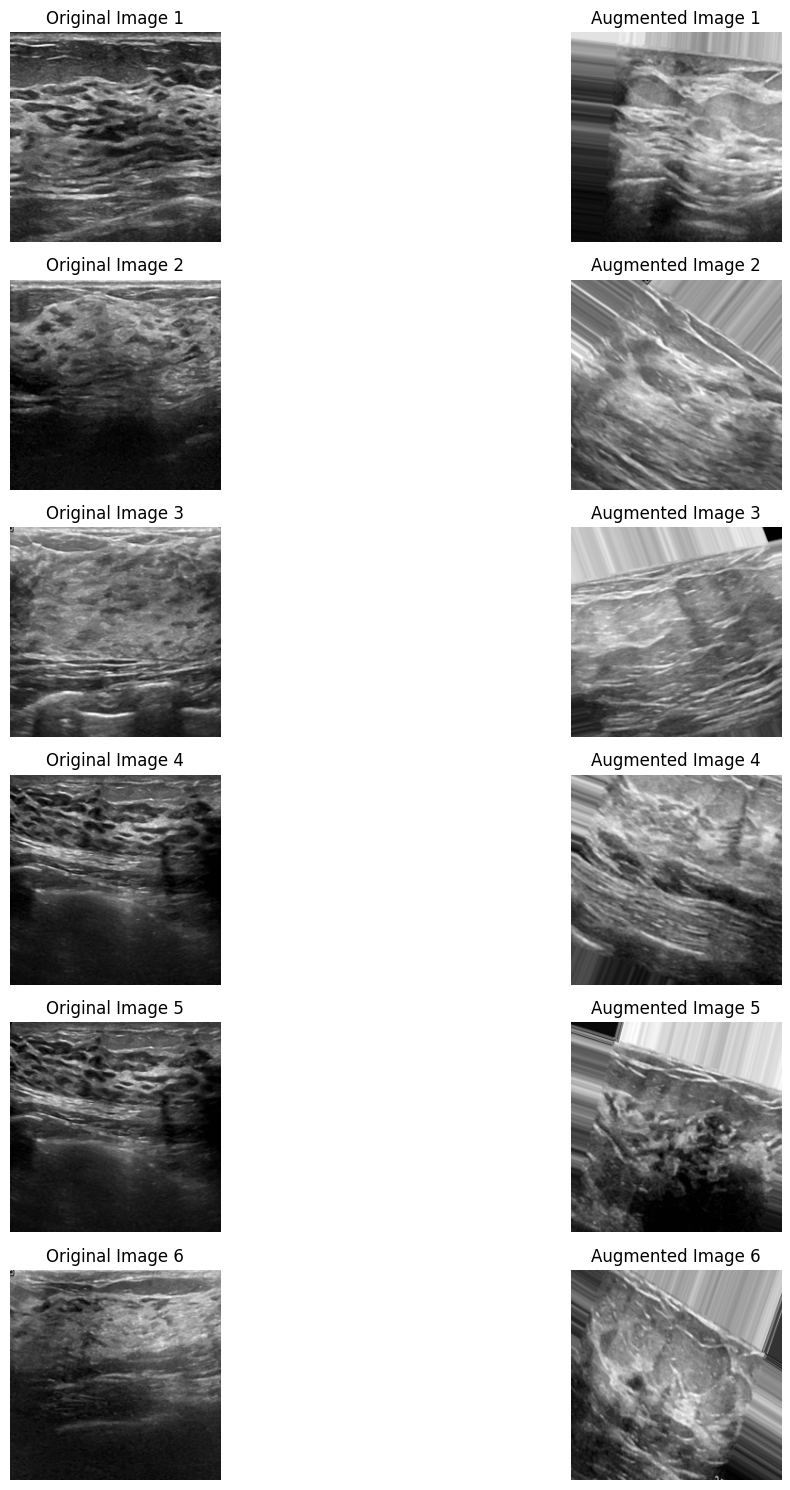

In [ ]:
# Display augmented images alongside original images
total_augmented_images = np.concatenate([augmented_normal_images, augmented_benign_images, augmented_malignant_images])
total_original_images = np.concatenate([processed_normal_images, processed_benign_images, processed_malignant_images])

# Determine the number of images to display
num_images = min(6, len(total_original_images), len(total_augmented_images))

# Visualize original images alongside augmented images
plt.figure(figsize=(15, 15))

for i in range(num_images):
    # Original Image
    plt.subplot(num_images, 2, i*2 + 1)
    plt.imshow(total_original_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Original Image {i+1}')

    # Augmented Image
    plt.subplot(num_images, 2, i*2 + 2)
    plt.imshow(total_augmented_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}')

plt.tight_layout()
plt.show()


### d. Create labels

Next, we assign the following labels to each category of images and augment them to have an equal number of labels as the images:
- 0, to normal images
- 1, to benign images
- 2, to malignant images

In [ ]:
# Factor for the number of augmented images generated per original image
augmentation_factor = 10

# Augment images for each class
augmented_normal_images = augment_images(processed_normal_images, num_augmented_per_image=augmentation_factor)
augmented_benign_images = augment_images(processed_benign_images, num_augmented_per_image=augmentation_factor)
augmented_malignant_images = augment_images(processed_malignant_images, num_augmented_per_image=augmentation_factor)

# Create labels: 0 for normal, 1 for benign, 2 for malignant
normal_labels = np.zeros((len(augmented_normal_images),), dtype=int)
benign_labels = np.ones((len(augmented_benign_images),), dtype=int)
malignant_labels = np.full((len(augmented_malignant_images),), 2)

# Concatenate augmented images
X = np.concatenate([augmented_normal_images, augmented_benign_images, augmented_malignant_images])

# Ensure each image in X has the shape (224, 224)
X_images = [cv2.resize(img, (224, 224)) for img in X]

# Convert list of images back to numpy array
X = np.array(X_images)

# If the images are grayscale, they should have a single channel, so we expand dimensions
if len(X.shape) == 3:
    X = np.expand_dims(X, axis=-1)

# Combine the separate label arrays into a single array 'y' that holds all the labels
y = np.concatenate([normal_labels, benign_labels, malignant_labels])


In [ ]:
# Confirm shape of 'X'
X.shape

(13110, 224, 224, 1)

In [ ]:
# Confirm 'y' shape
y.shape

(13110,)

### e. Split the dataset

In this subsection, we divide our dataset into training set and a temporary set consisting of validation and test sets in the ratios 7:1:2 respectively.

In [ ]:
# Define the ratios
train_ratio = 0.7
validation_ratio = 0.10
test_ratio = 0.20

# Split the data into a training set and a temporary set for validation and testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=1 - train_ratio, random_state=42, stratify=y
)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=test_ratio, random_state=42, stratify=y_temp
)

# Output the shapes to verify the splits
X_train.shape, X_val.shape, X_test.shape

((9176, 224, 224, 1), (3147, 224, 224, 1), (787, 224, 224, 1))

In [ ]:
y_train.shape

(9176,)

- After splitting the dataset, the training set has 9176 images, validation set 3147 images, and test set 787 images, all in grayscale and with dimensions of 224x224 pixels.

# 4.0 Modeling

We will now build various CNN models that can predict the presence of breast cancer from the ultrasound images. Each model in this section is trained for 50 epochs with a batch size of 64.

## 4.1 Baseline CNN Model

The baseline convolutional neural network model consists of two convolutional layers, followed by max-pooling layers, a flatten layer, and two dense layers. The model uses the softmax activation in the last layer. It is then compiled using the Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric.

In [ ]:
# Define the model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Review the model summary
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Fit the model
results = baseline_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50
)

Epoch 1/50
144/144 [==============================] - 44s 229ms/step - loss: 1.1703 - accuracy: 0.4061 - val_loss: 1.0252 - val_accuracy: 0.4929
Epoch 2/50
144/144 [==============================] - 31s 218ms/step - loss: 1.0097 - accuracy: 0.4795 - val_loss: 1.0021 - val_accuracy: 0.5138
Epoch 3/50
144/144 [==============================] - 32s 219ms/step - loss: 0.9745 - accuracy: 0.5185 - val_loss: 0.9324 - val_accuracy: 0.5488
Epoch 4/50
144/144 [==============================] - 32s 219ms/step - loss: 0.9436 - accuracy: 0.5456 - val_loss: 0.8778 - val_accuracy: 0.5961
Epoch 5/50
144/144 [==============================] - 32s 219ms/step - loss: 0.9175 - accuracy: 0.5687 - val_loss: 0.8398 - val_accuracy: 0.6257
Epoch 6/50
144/144 [==============================] - 32s 222ms/step - loss: 0.8923 - accuracy: 0.5861 - val_loss: 0.8476 - val_accuracy: 0.6222
Epoch 7/50
144/144 [==============================] - 32s 221ms/step - loss: 0.8605 - accuracy: 0.6094 - val_loss: 0.7666 - val_ac

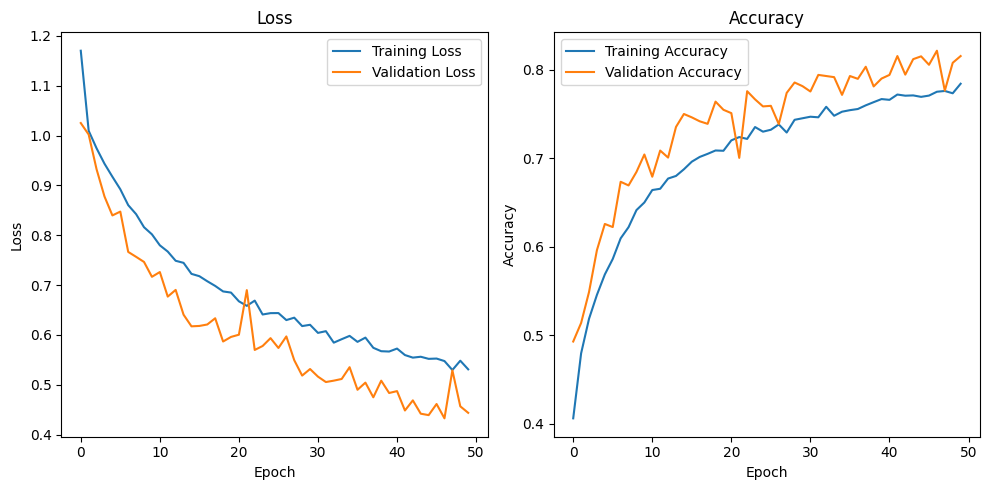

In [ ]:
# Visualize loss and accuracy metrics
training_loss = results.history['loss']
validation_loss = results.history['val_loss']
training_accuracy = results.history['accuracy']
validation_accuracy = results.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = baseline_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

25/25 [==============================] - 0s 19ms/step - loss: 0.4300 - accuracy: 0.8297
Test Loss: 0.4300
Test Accuracy: 0.8297


Interpretation:
- The baseline model achieves a validation accuracy of 81.54% and a test accuracy of 82.97%, signifying that it is performing fairly well in predicting correctly.

- The loss value of 0.43 is also quite low, indicating that the model's predictions are closer to the true lables.

In [ ]:
# Predict classes for validation set
y_pred = baseline_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes))

99/99 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1049
           1       0.80      0.72      0.76      1049
           2       0.81      0.84      0.83      1049

    accuracy                           0.82      3147
   macro avg       0.81      0.82      0.81      3147
weighted avg       0.81      0.82      0.81      3147



#### Observations:

- The accuracy of 82% achieved by the baseline model indicates that 82% of the ultrasound images were correctly classified into their rightful classes.

- For class 0, which represents normal ultrasound images, the recall score of 0.88 indicates that the model correctly categorised 88% of normal cases out of the total number of normal cases.

- For class 1 representing benign ultrasound images, the recall score of 0.72 indicates that the model correctly categorised 72% of benign cases out of the total number of benign cases.

- For class 2 representing malignant ultrasound images, out of all malignant cases, the model correctly classified 84% of the cases.

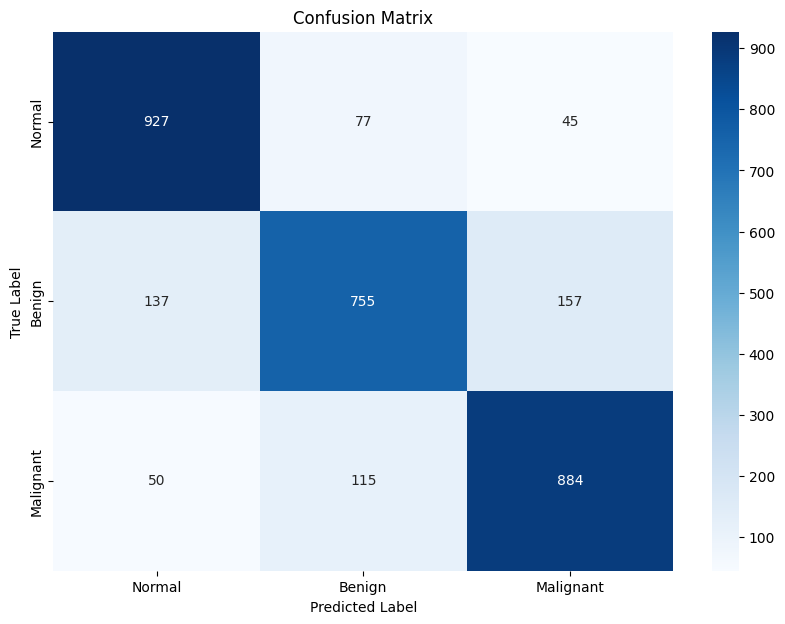

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the baseline model
baseline_model.save('baseline_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 4.2 Model 2: Baseline model with added layers

This model builds upon the baseline model by including additional convolutional layers and dropout layers, batch normalization, and early stopping. The model is compiled with the adam optimizer and uses 'sparse_categorical_crossentropy' as the loss function.

In [ ]:
# Define the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model_2.compile(optimizer = Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Review the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)     

In [ ]:
# Fit the model
results_2 = model_2.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks = [early_stopping]
)

Epoch 1/50
144/144 [==============================] - 40s 252ms/step - loss: 1.4044 - accuracy: 0.4416 - val_loss: 29.5420 - val_accuracy: 0.3333
Epoch 2/50
144/144 [==============================] - 35s 241ms/step - loss: 1.0841 - accuracy: 0.4944 - val_loss: 1.2592 - val_accuracy: 0.3473
Epoch 3/50
144/144 [==============================] - 35s 239ms/step - loss: 0.9881 - accuracy: 0.5367 - val_loss: 6.8886 - val_accuracy: 0.4296
Epoch 4/50
144/144 [==============================] - 35s 239ms/step - loss: 0.9800 - accuracy: 0.5438 - val_loss: 2.6723 - val_accuracy: 0.3502
Epoch 5/50
144/144 [==============================] - 34s 236ms/step - loss: 0.9629 - accuracy: 0.5556 - val_loss: 3.3760 - val_accuracy: 0.3470
Epoch 6/50
144/144 [==============================] - 34s 235ms/step - loss: 0.8561 - accuracy: 0.6153 - val_loss: 1.8934 - val_accuracy: 0.4420
Epoch 7/50
144/144 [==============================] - 34s 236ms/step - loss: 0.7978 - accuracy: 0.6563 - val_loss: 5.2245 - val_a

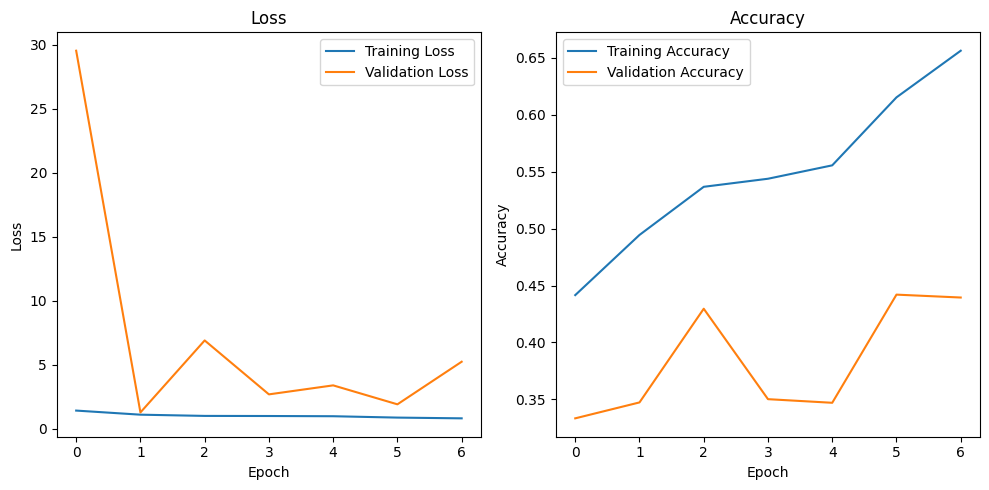

In [ ]:
# Visualize loss and accuracy metrics
training_loss = results_2.history['loss']
validation_loss = results_2.history['val_loss']
training_accuracy = results_2.history['accuracy']
validation_accuracy = results_2.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_2:.4f}")
print(f"Test Accuracy: {test_accuracy_2:.4f}")

25/25 [==============================] - 1s 22ms/step - loss: 1.2457 - accuracy: 0.3494
Test Loss: 1.2457
Test Accuracy: 0.3494


Interpretation:
- Compared to the baseline model, the test loss for this model is significantly higher.

- The test accuracy suggests that this model is correct in predicting only about 35% of all predictions.

In [ ]:
# Predict classes for validation set
y_pred_2 = model_2.predict(X_val)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes_2))

99/99 [==============================] - 2s 17ms/step
              precision    recall  f1-score   support

           0       0.59      0.05      0.09      1049
           1       0.00      0.00      0.00      1049
           2       0.34      0.99      0.51      1049

    accuracy                           0.35      3147
   macro avg       0.31      0.35      0.20      3147
weighted avg       0.31      0.35      0.20      3147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Observations:

- The accuracy of 35% achieved by the second model indicates that only 35%% of the ultrasound images were correctly classified into their rightful classes.

-  The recall score of only 0.05 for the normal class is quite low, indicating that the model is potentially missing many true instances in the normal class and correctly predicting only 5% of normal cases out of all normal cases.

- The model further fails to predict any instances from the benign class, returning a recall score of 0.

- However, the 0.99 recall score on the malignant class is concerning and indicates that the model is capturing almost all malignant instances at the expense of misclassifying the other classes.

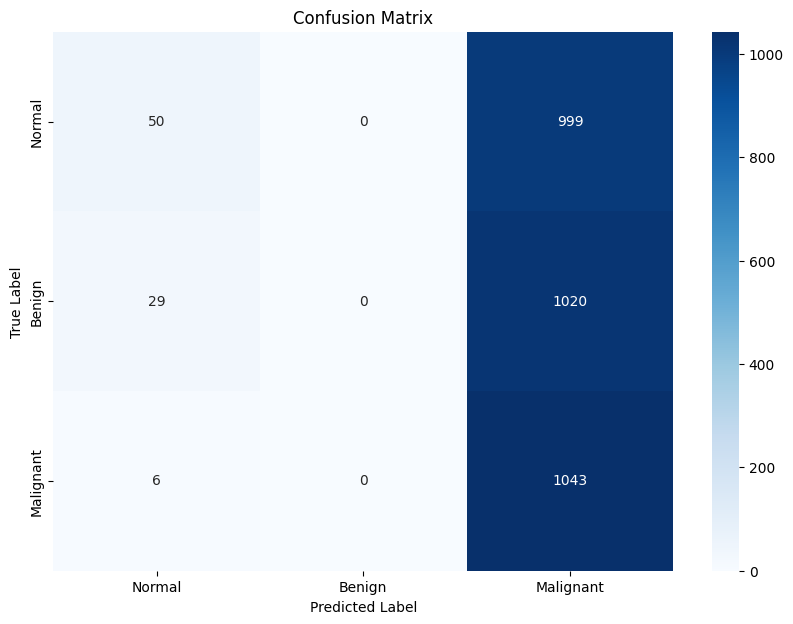

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes_2)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the second model
model_2.save('model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 4.3 Model 3: VGG16 model

For our third model, we leverage a pretrained model - VGG16- and customise it to cater to our specific classification task.

In [ ]:
# VGG16 model without pre-trained weights and top layers

vgg = VGG16(input_shape = (224, 224, 1), weights=None, include_top=False)

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
output = Dense(3, activation='softmax')(x)

model_3 = Model(inputs=vgg.input, outputs=output)

# Compile the model
model_3.compile(
  loss= 'sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Review model summary
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Fit the model
results_3 = model_3.fit(datagen.flow(
    X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50
)

Epoch 1/50
144/144 [==============================] - 65s 389ms/step - loss: 1.0958 - accuracy: 0.3560 - val_loss: 1.0912 - val_accuracy: 0.3937
Epoch 2/50
144/144 [==============================] - 45s 309ms/step - loss: 1.0912 - accuracy: 0.3850 - val_loss: 1.0846 - val_accuracy: 0.4160
Epoch 3/50
144/144 [==============================] - 45s 312ms/step - loss: 1.0871 - accuracy: 0.4020 - val_loss: 1.0791 - val_accuracy: 0.4725
Epoch 4/50
144/144 [==============================] - 45s 311ms/step - loss: 1.0825 - accuracy: 0.4192 - val_loss: 1.0751 - val_accuracy: 0.4325
Epoch 5/50
144/144 [==============================] - 44s 308ms/step - loss: 1.0802 - accuracy: 0.4124 - val_loss: 1.0697 - val_accuracy: 0.4560
Epoch 6/50
144/144 [==============================] - 45s 310ms/step - loss: 1.0776 - accuracy: 0.4236 - val_loss: 1.0664 - val_accuracy: 0.4643
Epoch 7/50
144/144 [==============================] - 45s 309ms/step - loss: 1.0760 - accuracy: 0.4203 - val_loss: 1.0634 - val_ac

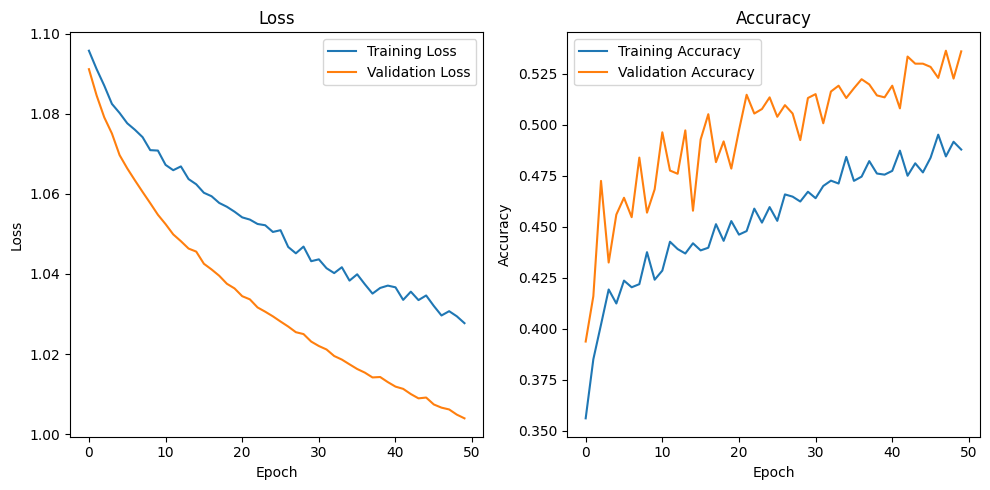

In [ ]:
# Visualize loss and accuracy metrics
training_loss = results_3.history['loss']
validation_loss = results_3.history['val_loss']
training_accuracy = results_3.history['accuracy']
validation_accuracy = results_3.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_3:.4f}")
print(f"Test Accuracy: {test_accuracy_3:.4f}")

25/25 [==============================] - 6s 237ms/step - loss: 1.0008 - accuracy: 0.5362
Test Loss: 1.0008
Test Accuracy: 0.5362


Interpretation:
- The test loss on this model is significantly higher, indicating that the model's predictions are not close to the true labels.

- 53.62% test accuracy suggests that this model is correct in predictions slightly more than half the time. However, this accuracy is significantly lower than that achieved by the baseline model.

In [ ]:
# Predict classes for validation set
y_pred_3 = model_3.predict(X_val)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes_3))

99/99 [==============================] - 11s 114ms/step
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      1049
           1       0.54      0.49      0.51      1049
           2       0.57      0.57      0.57      1049

    accuracy                           0.54      3147
   macro avg       0.54      0.54      0.54      3147
weighted avg       0.54      0.54      0.54      3147



#### Observations:
- The third model achieves 54% aaccuracy in correctly classifying the ultrasound images into their rightful classes.

- For the normal class, the recall score of 0.55 indicates that 55% of the sample cases predicted as normal cases were actually normal.

- For the benign class, the model correctly classified 49% of all actual benign cases.

- For the malignant class, 57% of malignant ultrasound images were categorised correctly.

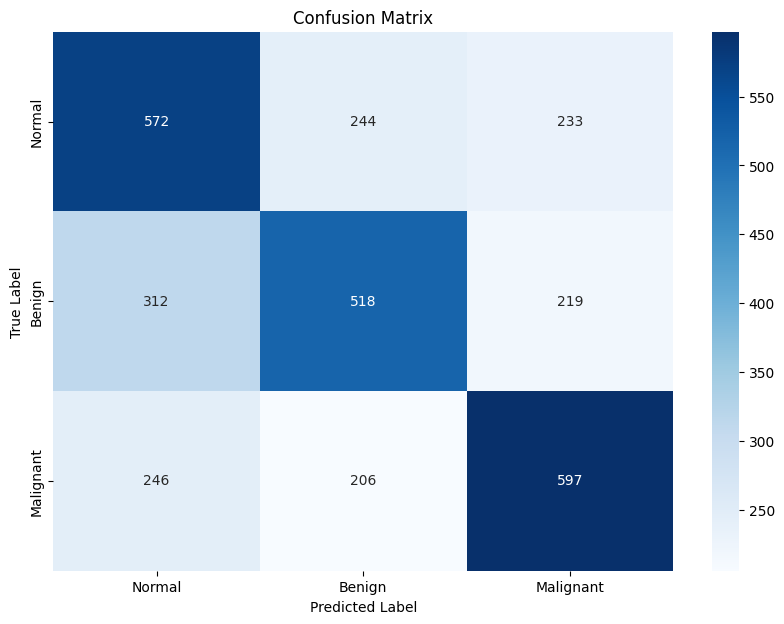

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes_3)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the third model
model_3.save('model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5.0 Model Evaluation

We evaluate the three models based on accuracy and recall to identify the best-performing model.

## 5.1 Model comparison

In [ ]:
# Print results for the three models used
models = [baseline_model, model_2, model_3]
model_names = ["baseline_model", "model_2", "model_3"]
classes = ['normal', 'benign', 'malignant']

# Define a result table as a DataFrame
columns = ['models', 'accuracy'] + [f"recall_{cls}" for cls in classes]
result_table = pd.DataFrame(columns=columns)

# Evaluate the models and record the results
for idx, model in enumerate(models):
    model_name = model_names[idx]
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Overall accuracy
    accuracy = accuracy_score(y_val, y_pred_classes)

    # Class-wise recall
    recalls = recall_score(y_val, y_pred_classes, average=None)

    # Construct the results row
    results = {'models': model_name, 'accuracy': accuracy}
    results.update({f"recall_{cls}": recalls[i] for i, cls in enumerate(classes)})

    result_table = pd.concat([result_table, pd.DataFrame([results])], ignore_index=True)

# Set the name of the models as index labels
result_table.set_index('models', inplace=True)

result_table

99/99 [==============================] - 11s 115ms/step


accuracy  recall_normal  recall_benign  recall_malignant
models                                                                  
baseline_model  0.815380       0.883699       0.719733          0.842707
model_2         0.347315       0.047664       0.000000          0.994280
model_3         0.536066       0.545281       0.493804          0.569113

- Based on the accuracy and recall scores, the baseline model is able to predict fairly well and outperforms the latter two with the highest accuracy and recall scores for the three classes.

- Despite the deeper architecture of the second model, it is not performing well across the classes. While the adapted VGG model performs better than the second model, its performance remains below that of the baseline model.

- Thus, we proceed to tune the baseline model.

## 5.2 Tuning the best model

The following code section conducts a grid search over various parameters to determine the optimal settings for refining our top-performing model. However, due to computational limitations which affect the grid search's efficiency, we use manual tuning to fine-tune our model.

In [ ]:
# # Define the model creation function
# def create_model(optimizer='adam'):
#     tuned_model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
#         MaxPooling2D((2, 2)),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D((2, 2)),
#         Flatten(),
#         Dense(128, activation='relu'),
#         Dense(3, activation='softmax')
#     ])
#     tuned_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return tuned_model

# # Define hyperparameters
# optimizers = ['adam']
# batch_sizes = [16, 32, 64]
# epochs_list = [25, 50, 100]

# # Grid search
# best_score = 0
# best_params = None

# for optimizer in optimizers:
#     for batch_size in batch_sizes:
#         for epochs in epochs_list:
#             tuned_model = create_model(optimizer)
#             best_results = tuned_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
#                                 epochs=epochs,
#                                 validation_data=(X_val, y_val),
#                                 verbose=0)
#             val_accuracy = max(best_results.history['val_accuracy'])
#             print(f"Optimizer: {optimizer}, Batch Size: {batch_size}, Epochs: {epochs}, Validation Accuracy: {val_accuracy:.4f}")

#             if val_accuracy > best_score:
#                 best_score = val_accuracy
#                 best_params = (optimizer, batch_size, epochs)

# print("\\nBest Parameters:")
# print(f"Optimizer: {best_params[0]}, Batch Size: {best_params[1]}, Epochs: {best_params[2]}, Best Validation Accuracy: {best_score:.4f}")


In [ ]:
# Define the model
tuned_baseline = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
tuned_baseline.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Review the model summary
tuned_baseline.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 186624)            0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [ ]:
# Tune the parameters on the best performing model
epochs = 50
batch_size = 32

# Fit the best performing model
best_results = tuned_baseline.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_val, y_val),
    epochs=epochs
)

Epoch 1/50
287/287 [==============================] - 33s 113ms/step - loss: 0.6916 - accuracy: 0.7089 - val_loss: 0.5856 - val_accuracy: 0.7620
Epoch 2/50
287/287 [==============================] - 31s 108ms/step - loss: 0.6666 - accuracy: 0.7202 - val_loss: 0.6181 - val_accuracy: 0.7436
Epoch 3/50
287/287 [==============================] - 31s 108ms/step - loss: 0.6639 - accuracy: 0.7192 - val_loss: 0.5998 - val_accuracy: 0.7490
Epoch 4/50
287/287 [==============================] - 31s 108ms/step - loss: 0.6436 - accuracy: 0.7294 - val_loss: 0.5526 - val_accuracy: 0.7728
Epoch 5/50
287/287 [==============================] - 31s 107ms/step - loss: 0.6468 - accuracy: 0.7286 - val_loss: 0.5541 - val_accuracy: 0.7677
Epoch 6/50
287/287 [==============================] - 31s 107ms/step - loss: 0.6424 - accuracy: 0.7330 - val_loss: 0.6071 - val_accuracy: 0.7528
Epoch 7/50
287/287 [==============================] - 31s 107ms/step - loss: 0.6366 - accuracy: 0.7372 - val_loss: 0.5212 - val_ac

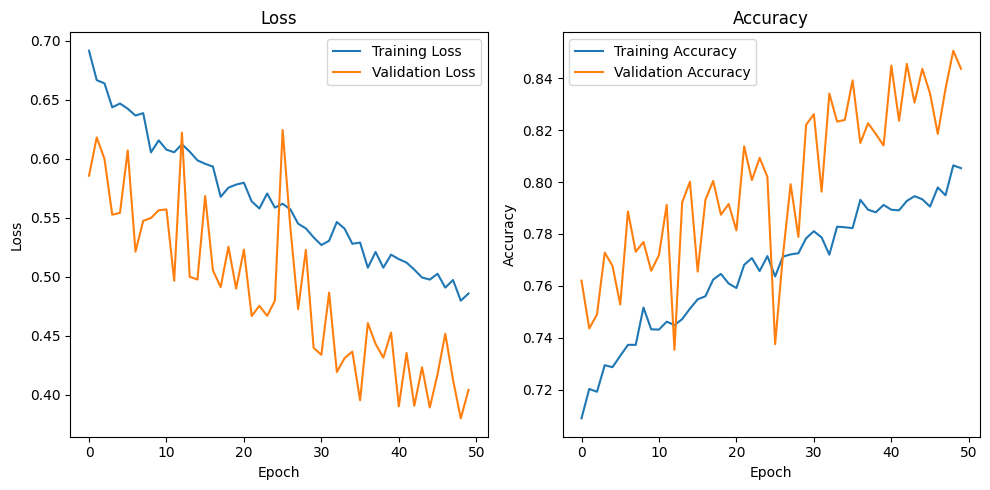

In [ ]:
# Visualize loss and accuracy metrics
training_loss = best_results.history['loss']
validation_loss = best_results.history['val_loss']
training_accuracy = best_results.history['accuracy']
validation_accuracy = best_results.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss_4, test_accuracy_4 = tuned_baseline.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss_4:.4f}")
print(f"Test Accuracy: {test_accuracy_4:.4f}")

25/25 [==============================] - 0s 12ms/step - loss: 0.4005 - accuracy: 0.8513
Test Loss: 0.4005
Test Accuracy: 0.8513


Interpretation:
- Compared to the baseline model, the tuned model achieves a lower test loss and higher accuracy, signifying an improvement in its performance.

In [ ]:
# Predict classes for validation set
y_pred_4 = tuned_baseline.predict(X_val)
y_pred_classes_4 = np.argmax(y_pred_4, axis=1)

# Print the classification report
print(classification_report(y_val, y_pred_classes_4))

99/99 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1049
           1       0.85      0.75      0.79      1049
           2       0.86      0.87      0.86      1049

    accuracy                           0.84      3147
   macro avg       0.84      0.84      0.84      3147
weighted avg       0.84      0.84      0.84      3147



Observation:
- The tuned model achieves an impressive accuracy of 84% which is an improvement from the accuracy of 81% achieved by the basline model.

- It also achieves 91% recall score for the normal class, 75% for the benign class and 87% for the malignant class, indicating that it is more effective in capturing instances of the respective classes correctly.

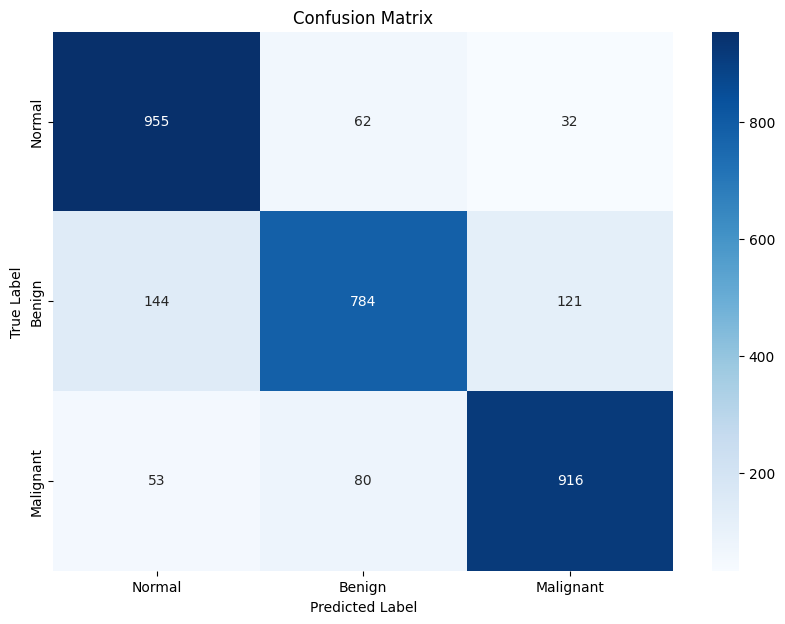

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes_4)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Normal', 'Benign', 'Malignant'],
            yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the model
tuned_baseline.save('tuned_baseline.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model testing with sample images

Next, we test our best performing model with a varity of images from each of the three classes to examine how it performs in predicting cases of cancer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from keras.models import load_model
# from keras.preprocessing import image
# import os
# import numpy as np
# from PIL import Image

# # Load the trained model
# saved_model = load_model('./tuned_baseline.h5')

# # Image path
# image_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/Sample_breast_ultrasounds/us-dataset/originals/malignant/us12.bmp')

# # Convert any image to PNG for consistent processing
# with open(image_path, "rb") as f:
#     with Image.open(f) as img:
#         img_format = img.format
#         if img_format != 'PNG':
#             png_path = os.path.splitext(image_path)[0] + '.png'
#             img.save(png_path, 'PNG')
#             image_path = png_path

# # Load and preprocess the image in grayscale
# img = image.load_img(image_path, color_mode='grayscale', target_size=(224, 224))
# image_array = image.img_to_array(img)
# image_array = np.expand_dims(image_array, axis=0)
# img_data = image_array / 255.0  # Normalize the image to [0, 1]

# # Predict using the model
# prediction = saved_model.predict(img_data)

# # Assuming class names are: ['Normal', 'Benign', 'Malignant']
# predicted_class = np.argmax(prediction)

# if predicted_class == 0:
#     print('The ultrasound appears normal.')
# elif predicted_class == 1:
#     print('The ultrasound shows benign signs.')
# else:
#     print('The ultrasound shows malignant signs indicative of breast cancer.')

# print(f'Prediction Probabilities: {prediction}')

In [ ]:
# Load the trained model
saved_model = load_model('./tuned_baseline.h5')

# Image path
image_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/Sample_breast_ultrasounds/us-dataset/originals/malignant/us105.bmp')

# Convert any image to PNG for consistent processing
with open(image_path, "rb") as f:
    with Image.open(f) as img:
        img_format = img.format
        if img_format != 'PNG':
            png_path = os.path.splitext(image_path)[0] + '.png'
            img.save(png_path, 'PNG')
            image_path = png_path

# Load and preprocess the image in grayscale
img = image.load_img(image_path, color_mode='grayscale', target_size=(224, 224))
image_array = image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0)
img_data = image_array / 255.0  # Normalize the image to [0, 1]

# Predict using the model
prediction = saved_model.predict(img_data)

# Assuming class names are: ['Normal', 'Benign', 'Malignant']
predicted_class = np.argmax(prediction)

if predicted_class == 0:
    print('The ultrasound appears normal.')
elif predicted_class == 1:
    print('The ultrasound shows benign signs.')
else:
    print('The ultrasound shows malignant signs indicative of breast cancer.')

print(f'Prediction Probabilities: {prediction}')

1/1 [==============================] - 0s 66ms/step
The ultrasound shows malignant signs indicative of breast cancer.
Prediction Probabilities: [[1.3204446e-04 2.2736237e-04 9.9964058e-01]]


## Conclusion

- Our model's achieved sensitivity ABOVE 80% demonstrateS its potential to make a substantial positive impact on patient outcomes and healthcare decision-making in the realm of early breast cancer detection.

- The training progression of the model indicates consistent improvement in
 its ability to classify breast cancer images. The steady decrease in training and validation loss also suggests model convergence and effective learning from the data.

- Overall, our deep learning based breast cancer prediction system holds significant promise for improving  detection and intervention in breast cancer cases.

## Recommendations

- Experiment with different model architectures and pretrained models like ResNet, Inception, or EfficientNet to enhance model performance.

- Establish a feedack loop with clinicians where model predictions can be reviewed and corrected.

- Expand the dataset with more diverse samples for increased model robustness.

- Incorporate patient metadata and clinical parameters for improved accuracy.